# Titanic problem

## Data exploration

Objective is to find clear objectives between feature columns and label

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn

### Reading in data

In [21]:
fil = r'data\train.csv'
df = pd.read_csv(fil)

### Basic data information

In [22]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Examining missing values

Conclusions: It appears as if 3rd class is overly represented in both cases. It also appears as if an empty cabin can be an indicator of survival rate.
A majority of passengers did not have a cabin

#### Age

In [23]:
# age
age_less_df = df[df.Age.isna()].copy()
age_less_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [24]:
# numeric values
age_less_df.describe().round()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.0,177.0,177.0,0.0,177.0,177.0,177.0
mean,436.0,0.0,3.0,NaN,1.0,0.0,22.0
std,251.0,0.0,1.0,NaN,2.0,1.0,32.0
min,6.0,0.0,1.0,NaN,0.0,0.0,0.0
25%,230.0,0.0,3.0,NaN,0.0,0.0,8.0
50%,452.0,0.0,3.0,NaN,0.0,0.0,8.0
75%,634.0,1.0,3.0,NaN,0.0,0.0,24.0
max,889.0,1.0,3.0,NaN,8.0,2.0,228.0


In [25]:
# categorical
categorical_columns = ['Name','Sex','Cabin', 'Embarked','Pclass']
a =age_less_df[categorical_columns].nunique(dropna = False)
b = age_less_df[categorical_columns].count()
pd.DataFrame(data = {'unique':a, 'count':age_less_df.shape[0]})


,unique,count
Name,177,177
Sex,2,177
Cabin,20,177
Embarked,3,177
Pclass,3,177


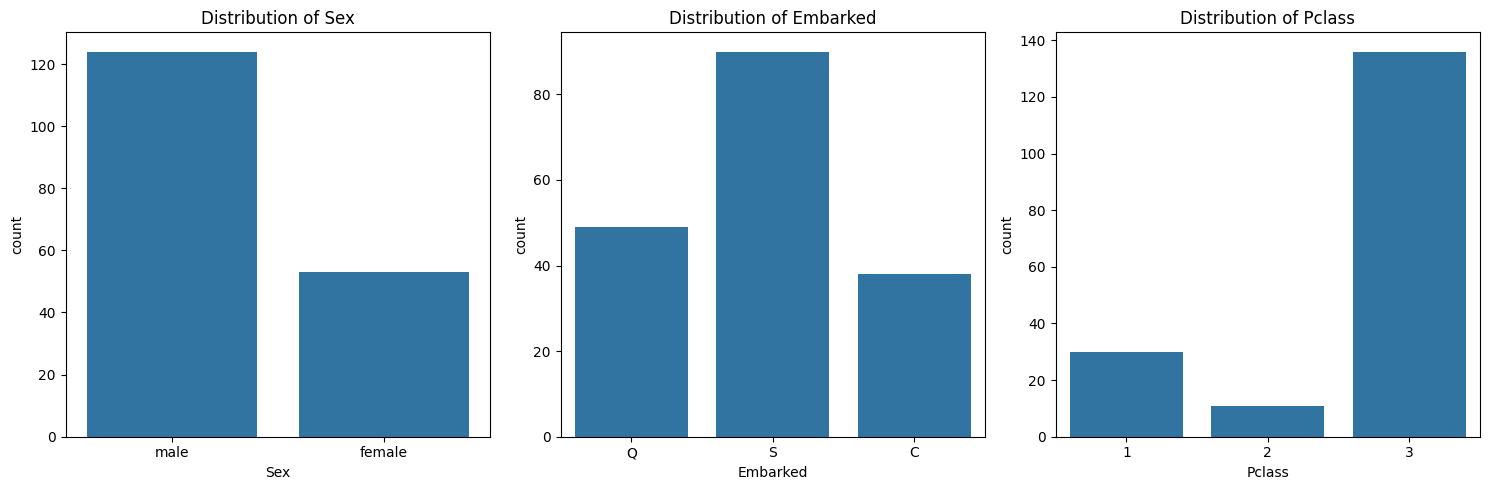

In [26]:
# Assuming your DataFrame is named age_less_df
categorical_columns = ['Sex', 'Embarked', 'Pclass']

# Create a figure and a set of subplots
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

# Loop through the columns and create a subplot for each one
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)  # (1 row, n columns, ith subplot)
    sns.countplot(x=column, data=age_less_df)
    plt.title(f'Distribution of {column}')

plt.tight_layout()  # Adjust the layout
plt.show()


<AxesSubplot: >

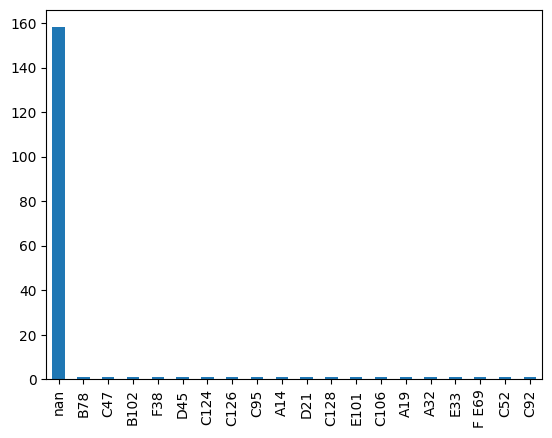

In [27]:
age_less_df.Cabin.value_counts(dropna=False).plot(kind = 'bar')

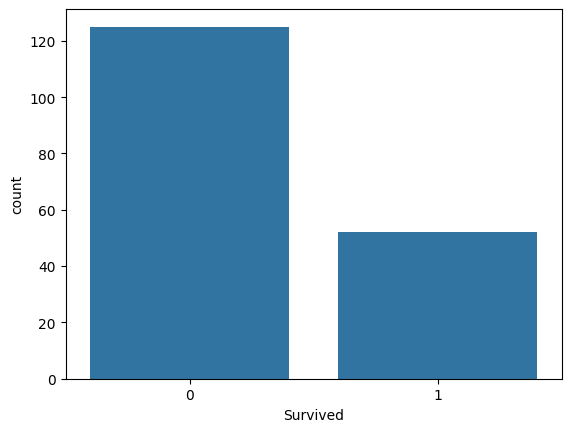

In [28]:
#survival rate
sns.countplot(x='Survived', data=age_less_df)
plt.show()

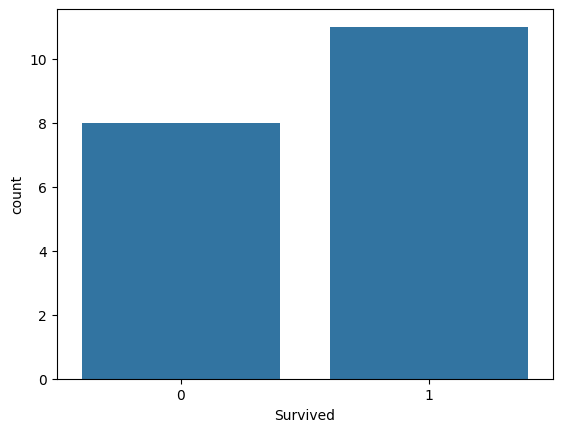

In [29]:
#survival rate - for passengers in cabin
sns.countplot(x='Survived', data=age_less_df[age_less_df.Cabin.isna() == False])
plt.show()

### Cabin

In [30]:
no_cabin_df = df[df.Cabin.isna()].copy()
print(no_cabin_df.info())
no_cabin_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  687 non-null    int64  
 1   Survived     687 non-null    int64  
 2   Pclass       687 non-null    int64  
 3   Name         687 non-null    object 
 4   Sex          687 non-null    object 
 5   Age          529 non-null    float64
 6   SibSp        687 non-null    int64  
 7   Parch        687 non-null    int64  
 8   Ticket       687 non-null    object 
 9   Fare         687 non-null    float64
 10  Cabin        0 non-null      object 
 11  Embarked     687 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 69.8+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [31]:
# numeric
no_cabin_df.describe().round()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,687.0,687.0,687.0,529.0,687.0,687.0,687.0
mean,443.0,0.0,3.0,28.0,1.0,0.0,19.0
std,259.0,0.0,1.0,13.0,1.0,1.0,29.0
min,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,214.0,0.0,2.0,19.0,0.0,0.0,8.0
50%,441.0,0.0,3.0,26.0,0.0,0.0,10.0
75%,664.0,1.0,3.0,35.0,1.0,0.0,23.0
max,891.0,1.0,3.0,74.0,8.0,6.0,512.0


In [32]:
# categorical
categorical_columns = ['Name','Sex', 'Embarked','Pclass']
a =no_cabin_df[categorical_columns].nunique(dropna = False)
b = no_cabin_df[categorical_columns].count()
pd.DataFrame(data = {'unique':a, 'count':no_cabin_df.shape[0]})

,unique,count
Name,687,687
Sex,2,687
Embarked,3,687
Pclass,3,687


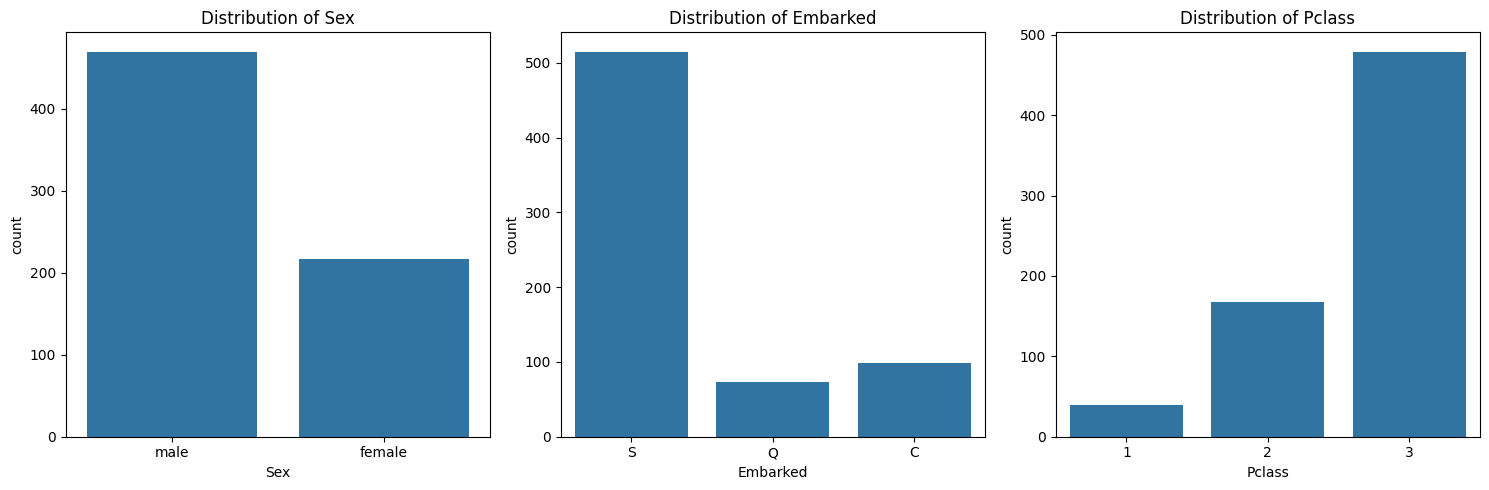

In [33]:
# categorical
categorical_columns = ['Sex', 'Embarked','Pclass']
# Create a figure and a set of subplots
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed

# Loop through the columns and create a subplot for each one
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, len(categorical_columns), i)  # (1 row, n columns, ith subplot)
    sns.countplot(x=column, data=no_cabin_df)
    plt.title(f'Distribution of {column}')

plt.tight_layout()  # Adjust the layout
plt.show()

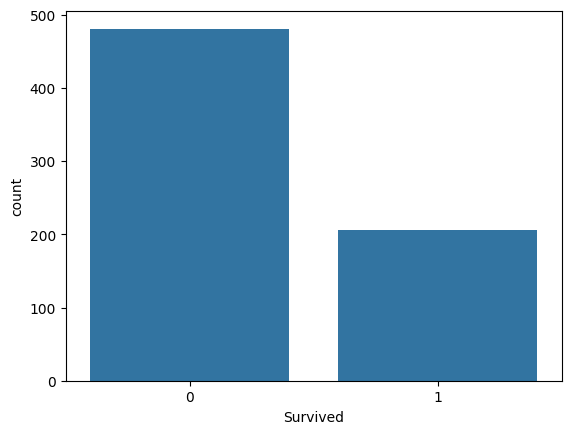

In [34]:
sns.countplot(x='Survived', data=no_cabin_df)
plt.show()

### Features

In [35]:
# Suspect class is greatest indicator of survival
df[['Pclass','Survived']].groupby('Pclass').mean()*100

,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253


In [36]:
df['no_cabin'] = df.Cabin.isna()

In [37]:
df[['Pclass','Survived','no_cabin']].groupby(['Pclass','no_cabin']).mean()*100


Survived
Pclass no_cabin           
1      False     66.477273
       True      47.500000
2      False     81.250000
       True      44.047619
3      False     50.000000
       True      23.590814

In [38]:
# Suspect class is greatest indicator of survival
df[['no_cabin','Survived']].groupby('no_cabin').mean()*100

,Survived
no_cabin,
False,66.666667
True,29.985444


In [39]:
df[['Sex','Survived']].groupby('Sex').mean()*100

,Survived
Sex,
female,74.203822
male,18.890815


In [40]:
df[['Pclass','Survived','Sex','no_cabin']].groupby(['Sex','Pclass','no_cabin']).mean()*100

Survived
Sex    Pclass no_cabin            
female 1      False      96.296296
              True      100.000000
       2      False      90.000000
              True       92.424242
       3      False      66.666667
              True       49.275362
male   1      False      41.052632
              True       22.222222
       2      False      66.666667
              True       12.745098
       3      False      33.333333
              True       13.196481

In [41]:
df[['Embarked','Survived']].groupby('Embarked').mean()*100

,Survived
Embarked,
C,55.357143
Q,38.961039
S,33.695652


## Model
- Logistic regression
- Random forest

### Feature selection
- Class, sex, embarkment, cabin

In [ ]:
# want to set this up as a pipeline
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier


# Create the 'no_cabin' feature
df['no_cabin'] = df['Cabin'].isna()

# Define categorical features
categorical_features = ['Pclass', 'Embarkment', 'Sex']

# OneHotEncoder for categorical variables
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Random Forest Model
rf_model = RandomForestClassifier()

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', rf_model)])

# Display the pipeline steps
pipeline.steps
